In [31]:
# See why it is required on mac, but isn't on pc.
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

In [32]:
import cv2

from MagicPoint.dataset.artificial_dataset import *
from common.utils import plot_images, load_config, rgb2gbr, to255scale

%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
config = load_config('../configs/config_toy.yaml')
data_config = config['data']

dataset = ArtificialDataset(TEST, data_config)


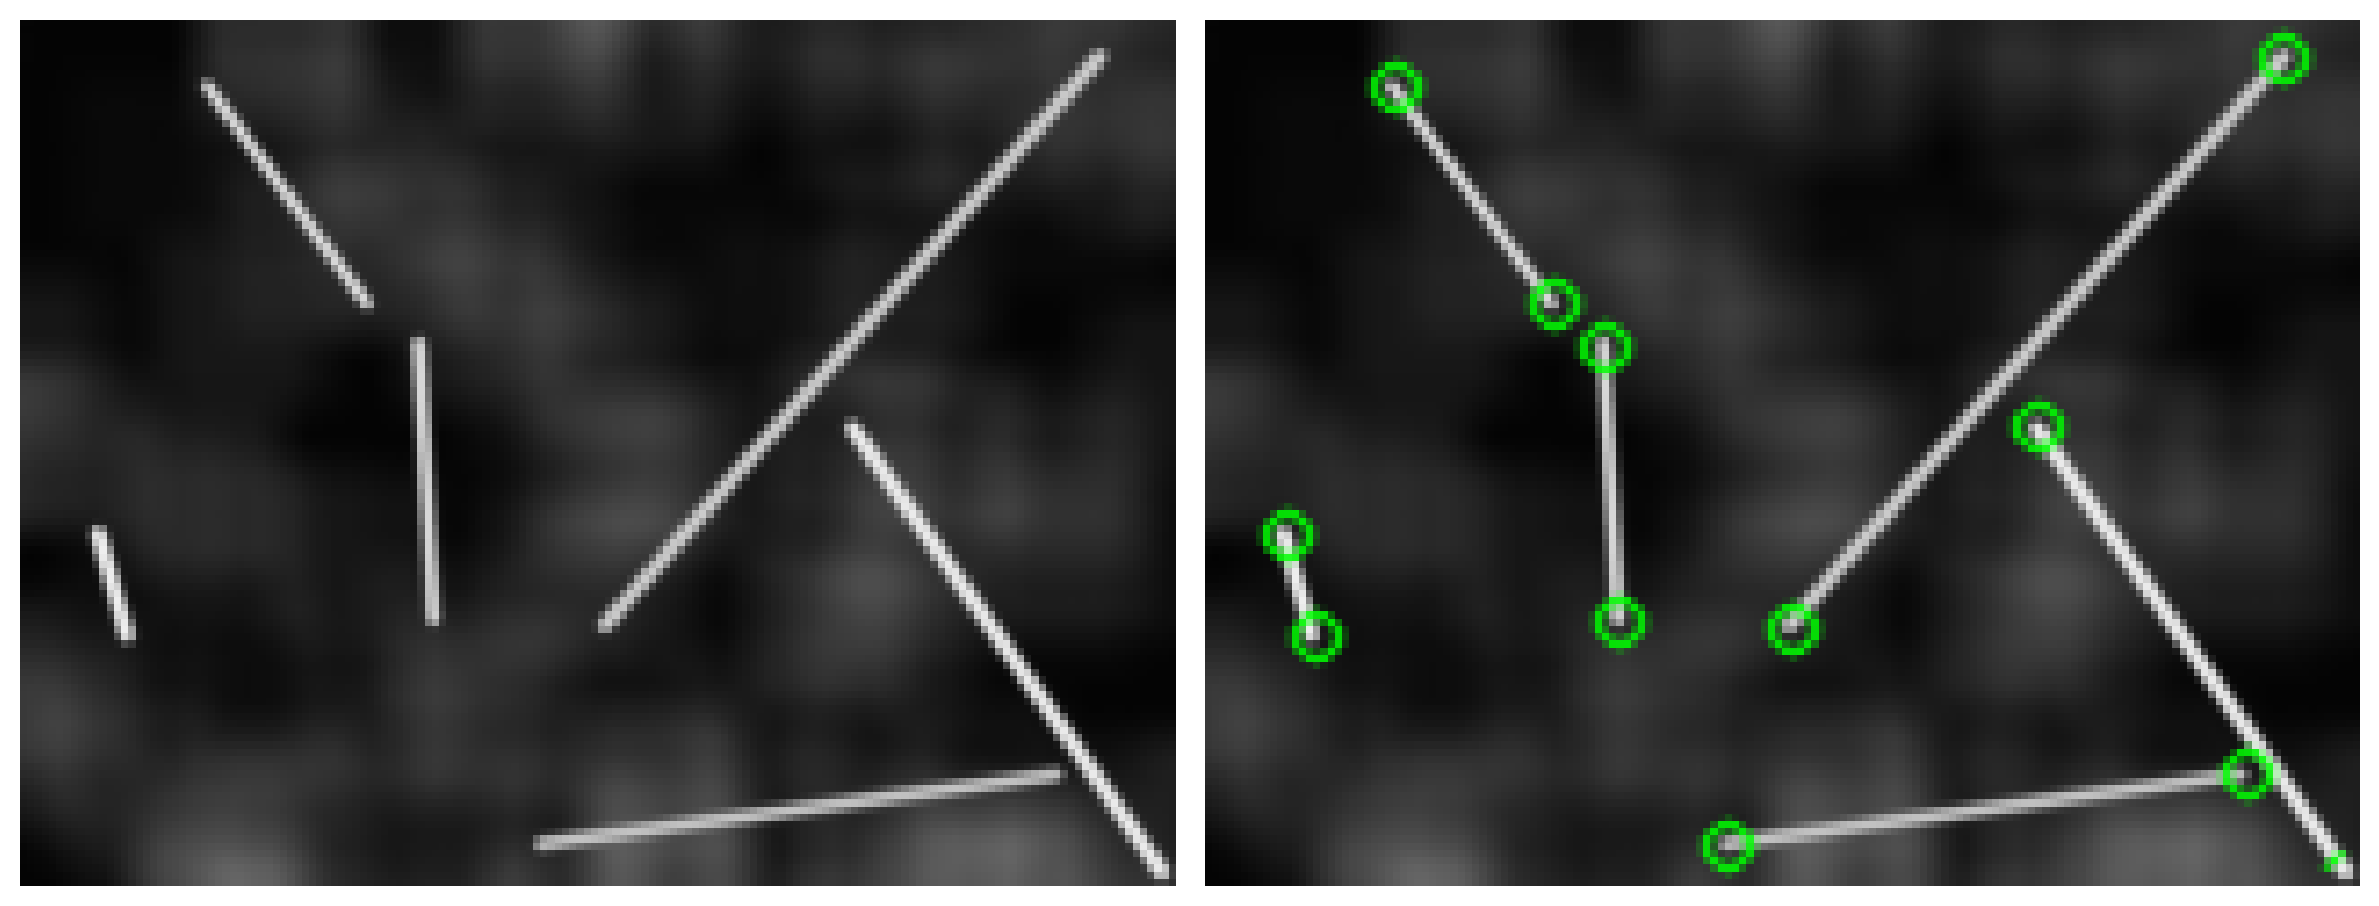

In [34]:
# Draw single image
      
index = np.random.randint(low=0, high=dataset.__len__())
item = dataset.__getitem__(index)

gbr_image = rgb2gbr(to255scale(item[IMAGE]))

frames = [gbr_image]
        
frame_keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(np.where(item[KEYPOINT_MAP])).T]
frames.append(cv2.drawKeypoints(gbr_image, frame_keypoints, None, color=(0, 255, 0)))

plot_images(frames, dpi=200)


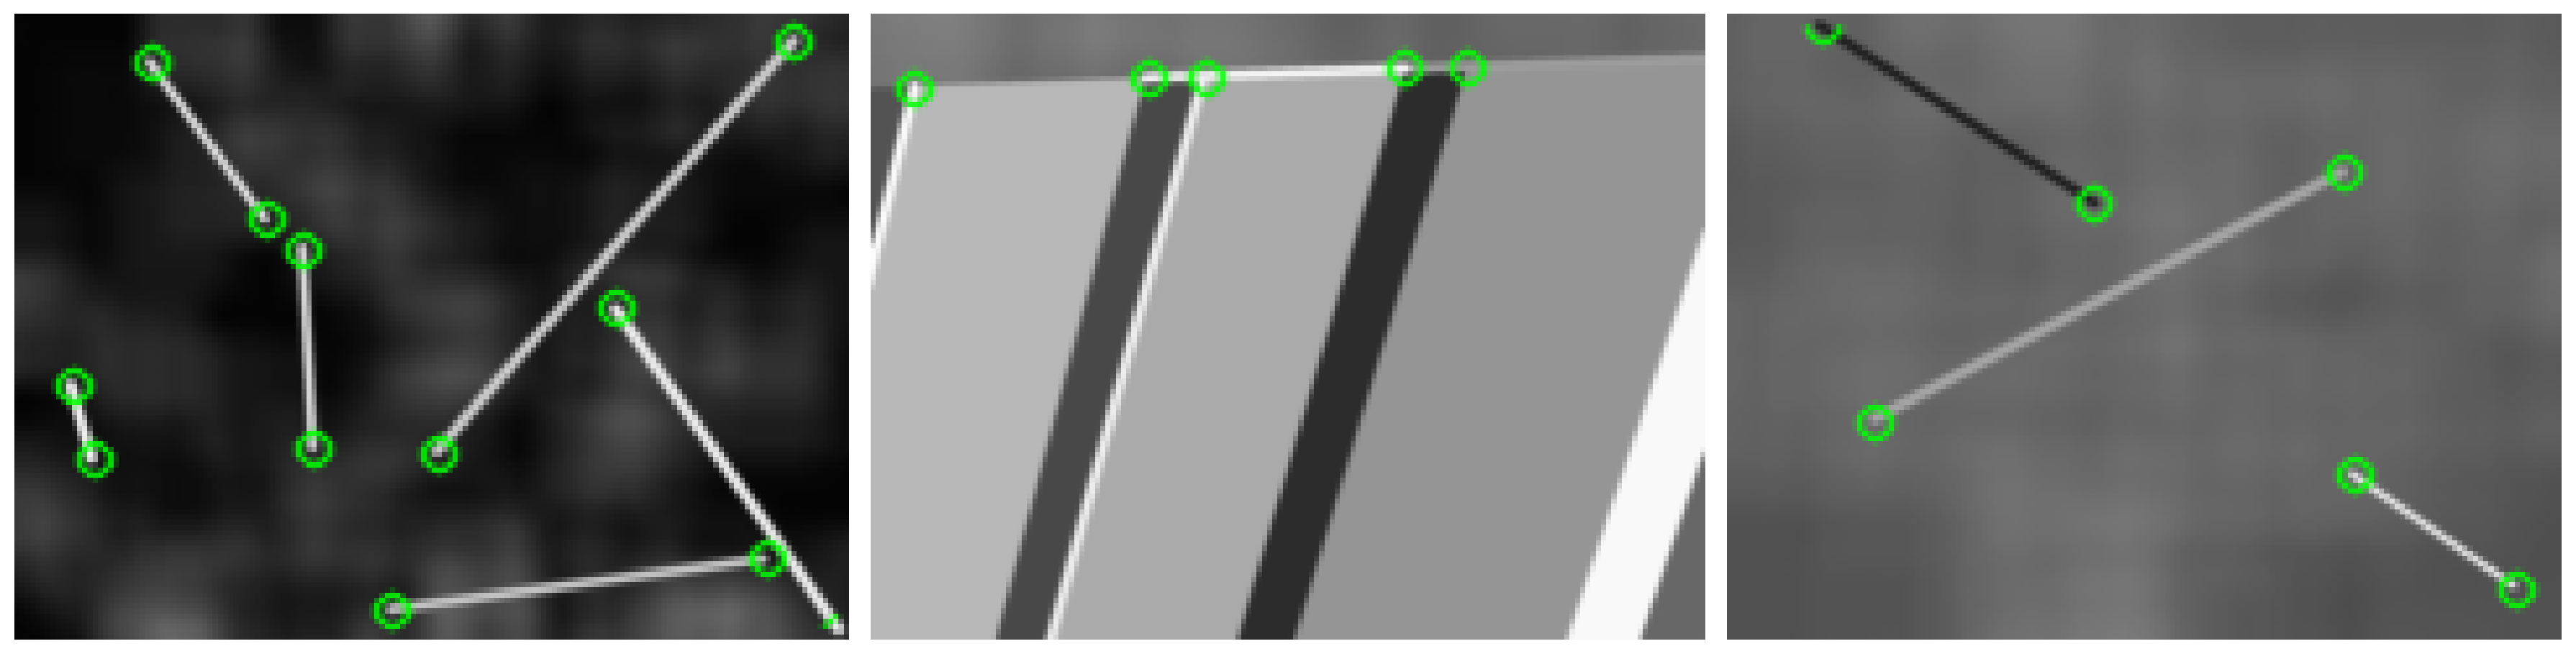

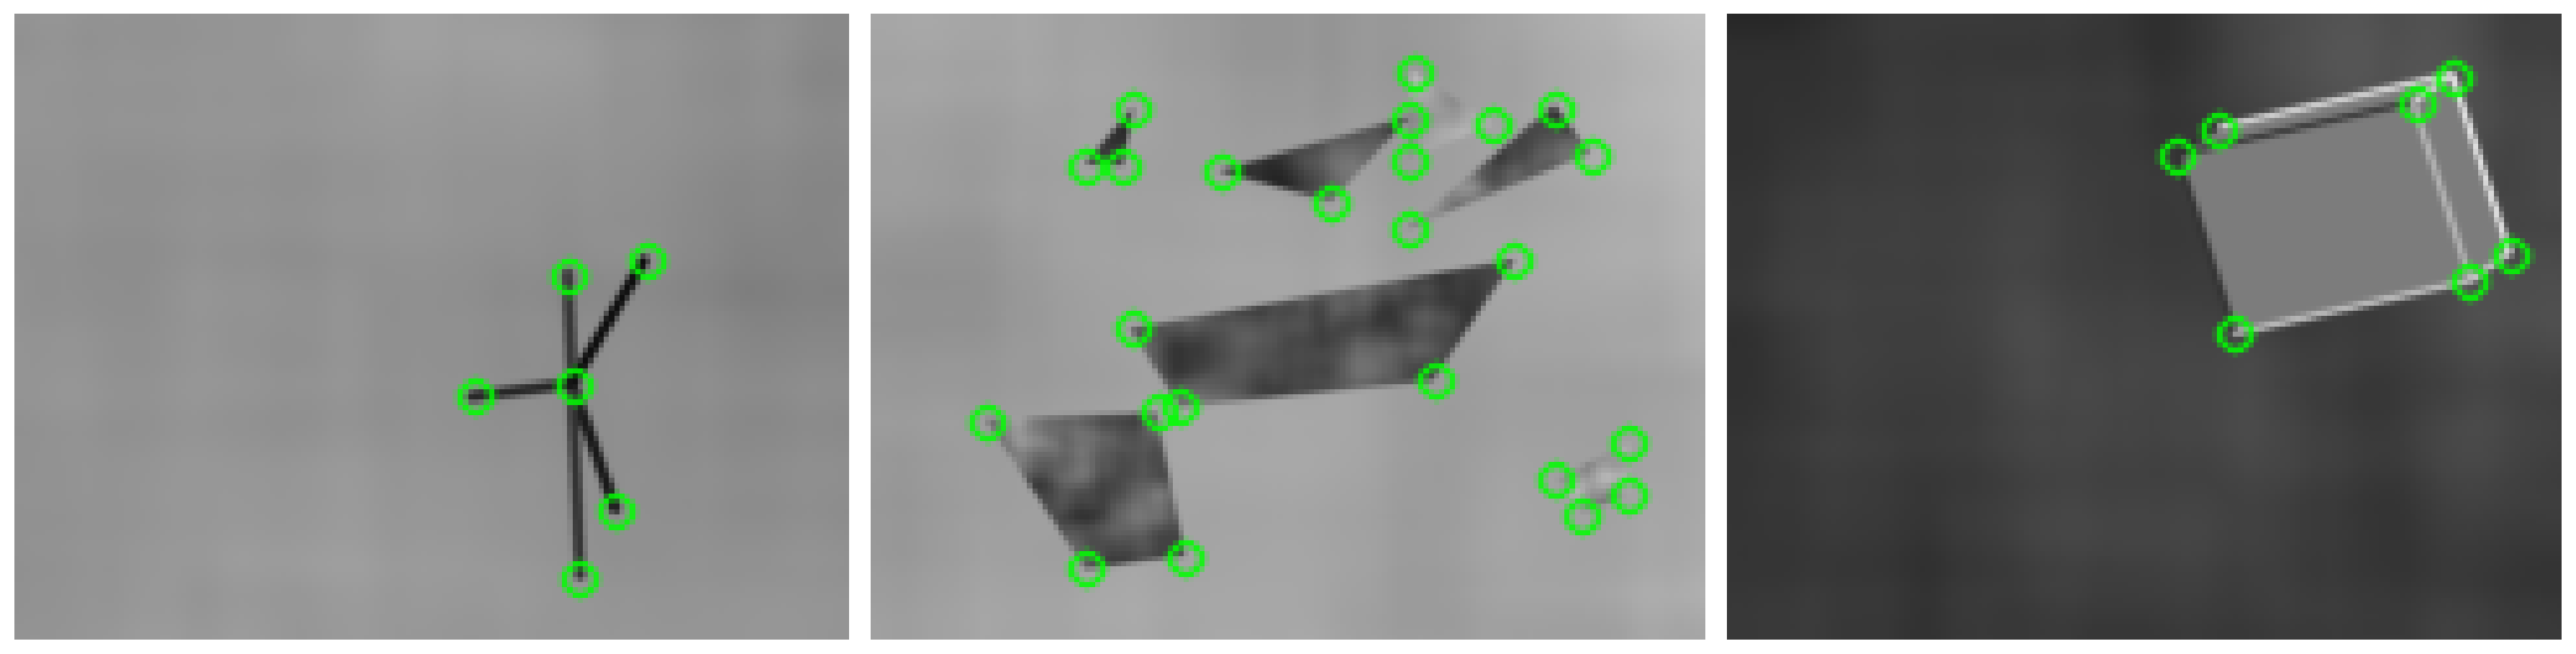

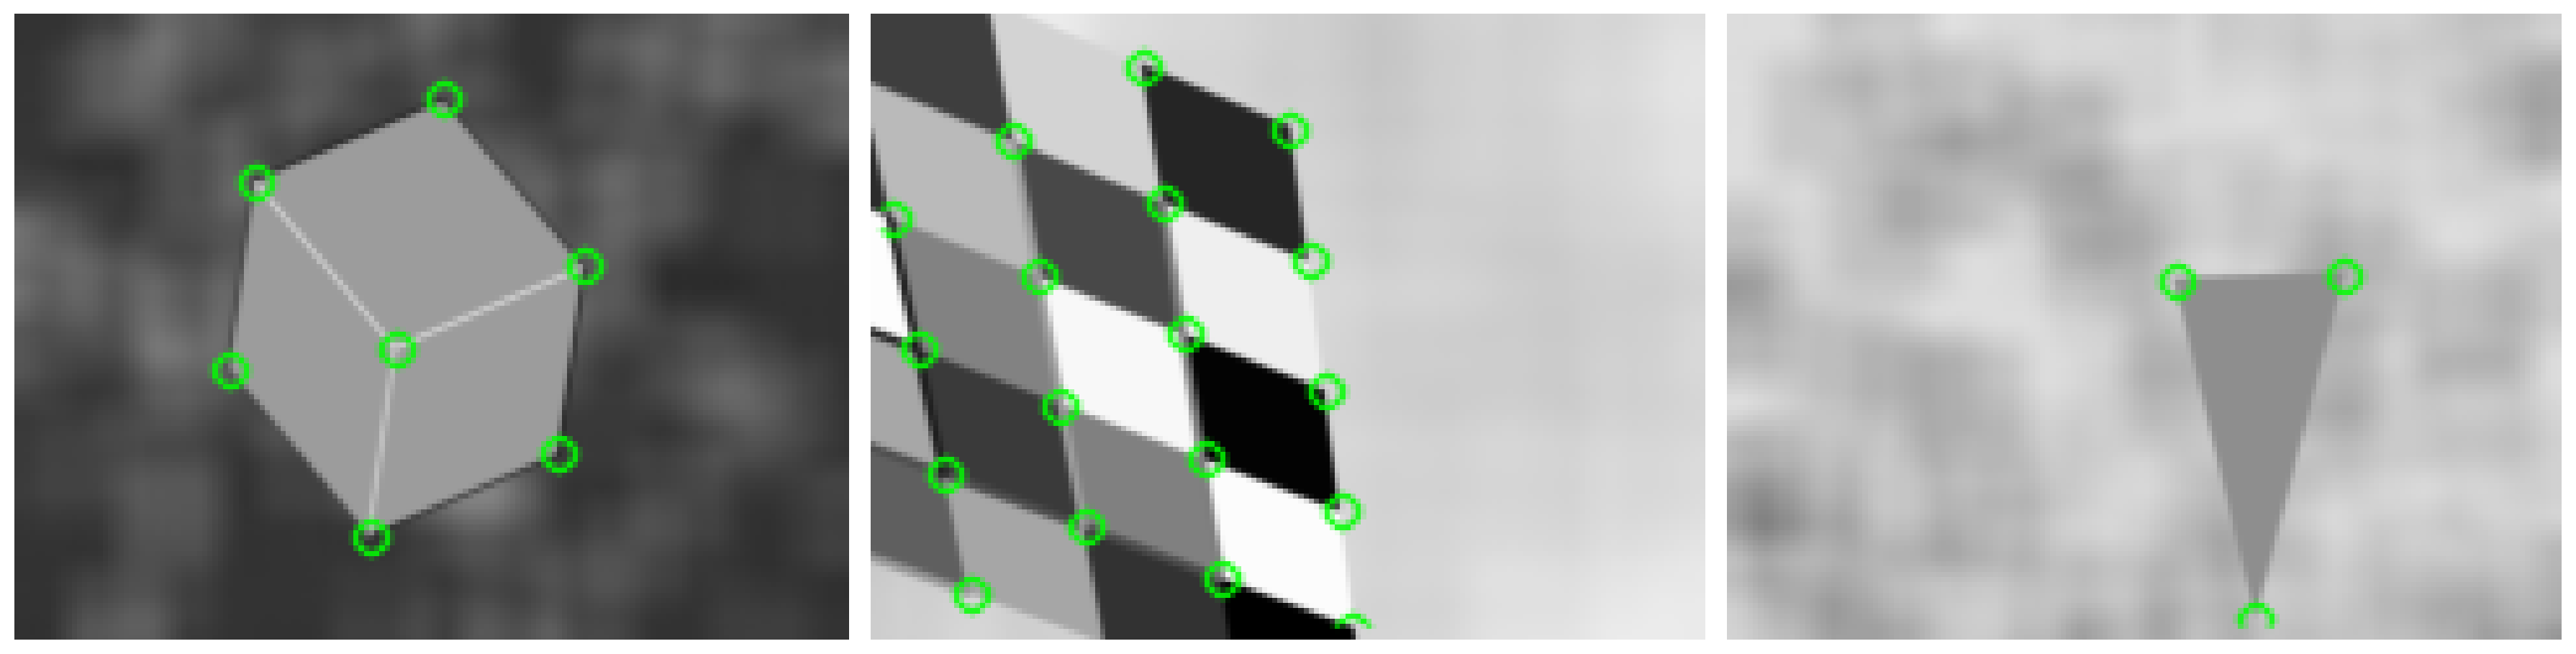

In [36]:
# Draw multiple images

rows = 3
columns = 3 

for _ in range(rows):
    frames = []
    for _ in range(columns):
        index = np.random.randint(low=0, high=dataset.__len__())
        item = dataset.__getitem__(index)
        
        gbr_image = rgb2gbr(to255scale(item[IMAGE]))
        
        frame_keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(np.where(item[KEYPOINT_MAP])).T]
        frames.append(cv2.drawKeypoints(gbr_image, frame_keypoints, None, color=(0, 255, 0)))
        
    plot_images(frames, dpi=200)
